# Mount Google Drive contents to access saved trained weights and training history

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


# store directory strings into variables

In [ ]:
experiment1_DQN_history = 'gdrive/MyDrive/DIA/SpaceInvadersDQN_dueling_1M/second session/dqn_SpaceInvadersDeterministic-v4_log.json'
experiment1_DQN_TL_history =  'gdrive/MyDrive/DIA/SpaceInvadersTL_DQN_dueling_1M_Breakout/breakout1MSpace1M/dqn_TLSpaceInvadersDeterministic-v4_log.json'
experiment1_DQN_finalweights = 'gdrive/MyDrive/DIA/SpaceInvadersDQN_dueling_1M/second session/dqn_SpaceInvadersDeterministic-v4_weights_1000000.h5f'
experiment1_DQN_TL_finalweights =  'gdrive/MyDrive/DIA/SpaceInvadersTL_DQN_dueling_1M_Breakout/breakout1MSpace1M/dqn_TLSpaceInvadersDeterministic-v4_weights_1000000.h5f'
experiment2_DQN_history = 'gdrive/MyDrive/DIA/SpaceInvadersDQN_dueling_1M/fourth session(boltzmann)/dqn_SpaceInvadersDeterministic-v4_log.json'
experiment2_DQN_TL_history = 'gdrive/MyDrive/DIA/SpaceInvadersTL_DQN_dueling_1M_Breakout/breakout1MSpace1M(boltzmann)/dqn_TLSpaceInvadersDeterministic-v4_log.json'

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# experiment 1 : DQN + TL vs  (plot first then decide if I wanna use them)




## Question 1

### rewards against training steps

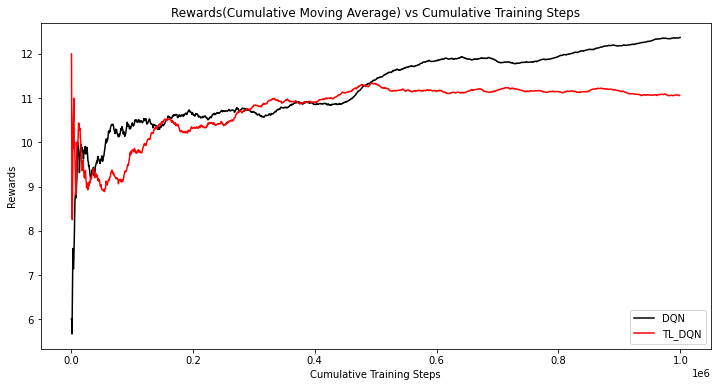

In [ ]:
# the dict in the log files are key to value pair, and the value is a long list
with open(experiment1_DQN_history) as json_file1:
  data1 = json.load(json_file1)

with open(experiment1_DQN_TL_history) as json_file2:
  data2 = json.load(json_file2)


dfy1 = pd.DataFrame.from_dict({'episode_reward' :data1['episode_reward']})
dfx1 = pd.DataFrame.from_dict({'nb_steps':data1['nb_steps']})
dfy2 = pd.DataFrame.from_dict({'episode_reward' :data2['episode_reward']})
dfx2 = pd.DataFrame.from_dict({'nb_steps':data2['nb_steps']})
plt.figure(figsize=(12, 6))
plt.plot(dfx1,dfy1.expanding(1).mean(), color='k', label = 'DQN')
plt.plot(dfx2,dfy2.expanding(1).mean(),  color='r', label = 'TL_DQN')
plt.xlabel("Cumulative Training Steps")
plt.ylabel("Rewards")
plt.title("Rewards(Cumulative Moving Average) vs Cumulative Training Steps") 
plt.legend()
plt.show()


### steps per episode against cumulative training steps

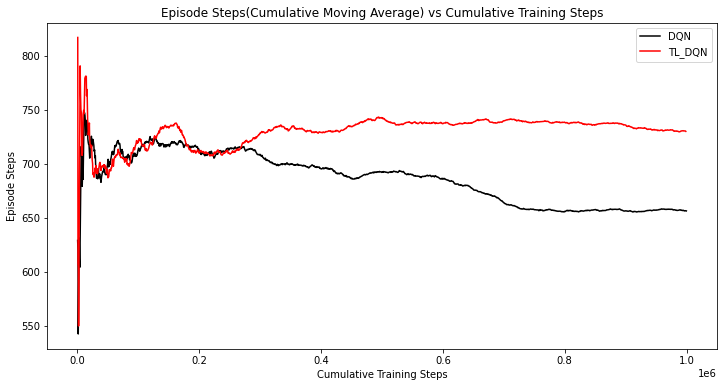

In [ ]:
dfy1 = pd.DataFrame.from_dict({'nb_episode_steps' :data1['nb_episode_steps']})
dfx1 = pd.DataFrame.from_dict({'nb_steps':data1['nb_steps']})
dfy2 = pd.DataFrame.from_dict({'nb_episode_steps' :data2['nb_episode_steps']})
dfx2 = pd.DataFrame.from_dict({'nb_steps':data2['nb_steps']})
plt.figure(figsize=(12, 6))
plt.plot(dfx1,dfy1.expanding().mean(), color='k', label = 'DQN')
plt.plot(dfx2,dfy2.expanding().mean(),  color='r', label = 'TL_DQN')
plt.xlabel("Cumulative Training Steps")
plt.ylabel("Episode Steps")
plt.title("Episode Steps(Cumulative Moving Average) vs Cumulative Training Steps")
plt.legend()
plt.show()

### means q against training steps

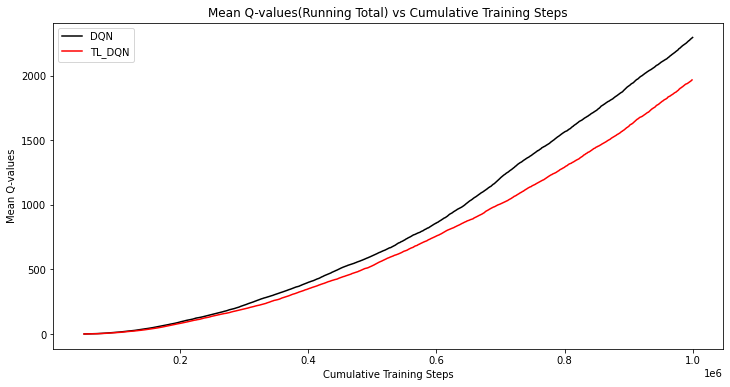

In [ ]:
dfy1 = pd.DataFrame.from_dict({'mean_q' :data1['mean_q']})
dfx1 = pd.DataFrame.from_dict({'nb_steps':data1['nb_steps']})
dfy2 = pd.DataFrame.from_dict({'mean_q' :data2['mean_q']})
dfx2 = pd.DataFrame.from_dict({'nb_steps':data2['nb_steps']})
plt.figure(figsize=(12, 6))
plt.plot(dfx1,dfy1.expanding().sum(), color='k', label = 'DQN')
plt.plot(dfx2,dfy2.expanding().sum(),  color='r', label = 'TL_DQN')
plt.xlabel("Cumulative Training Steps")
plt.ylabel("Mean Q-values")
plt.title("Mean Q-values(Running Total) vs Cumulative Training Steps") 
plt.legend()
plt.show()

### rmse against training steps

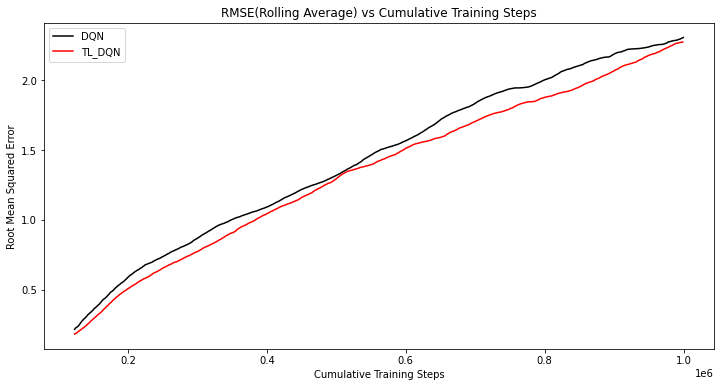

In [ ]:
dfy1 = pd.DataFrame.from_dict({'root_mean_squared_error' :data1['root_mean_squared_error']})
dfx1 = pd.DataFrame.from_dict({'nb_steps':data1['nb_steps']})
dfy2 = pd.DataFrame.from_dict({'root_mean_squared_error' :data2['root_mean_squared_error']})
dfx2 = pd.DataFrame.from_dict({'nb_steps':data2['nb_steps']})
plt.figure(figsize=(12, 6))
plt.plot(dfx1,dfy1.rolling(100).mean(), color='k', label = 'DQN')
plt.plot(dfx2,dfy2.rolling(100).mean(),  color='r', label = 'TL_DQN')
plt.xlabel("Cumulative Training Steps")
plt.ylabel("Root Mean Squared Error")
plt.title("RMSE(Rolling Average) vs Cumulative Training Steps") 
plt.show()

### loss against training steps

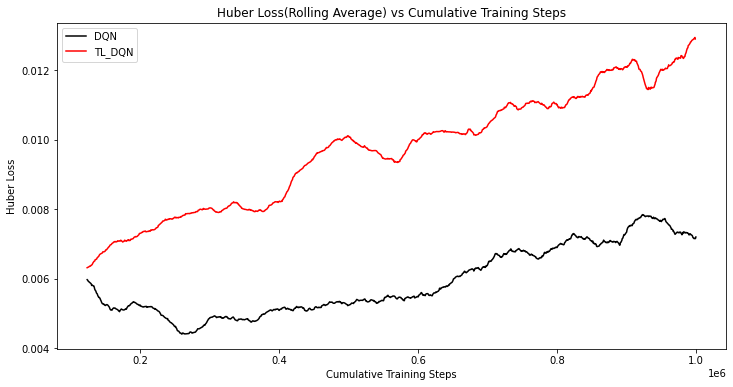

In [ ]:
dfy1 = pd.DataFrame.from_dict({'loss' :data1['loss']})
dfx1 = pd.DataFrame.from_dict({'nb_steps':data1['nb_steps']})
dfy2 = pd.DataFrame.from_dict({'loss' :data2['loss']})
dfx2 = pd.DataFrame.from_dict({'nb_steps':data2['nb_steps']})
plt.figure(figsize=(12, 6))
plt.plot(dfx1,dfy1.rolling(100).mean(), color='k', label = 'DQN')
plt.plot(dfx2,dfy2.rolling(100).mean(),  color='r', label = 'TL_DQN')
plt.xlabel("Cumulative Training Steps")
plt.ylabel("Huber Loss")
plt.title("Huber Loss(Rolling Average) vs Cumulative Training Steps") 
plt.legend()
plt.show()

## Question 2

### Test to see which agent has higher testing reward

In [ ]:
!pip install gym[atari]
!pip install stable-baselines3[extra]
!pip install keras-rl2

In [2]:
import tensorflow as tf
from PIL import Image
import numpy as np
import gym
import tensorflow as tf

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor

In [3]:
inputShape = (84, 84)
windowLength = 4

class AtariProcessor(Processor):
    def process_observation(self, obs):
        assert obs.ndim == 3 
        imgs = Image.fromarray(obs)
        imgs = imgs.resize(inputShape).convert('L')  
        obs = np.array(imgs)
        assert obs.shape == inputShape
        return obs.astype('uint8')  

    def process_state_batch(self, batch):
        batch = batch.astype('float32') / 255.
        return batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [4]:
env = gym.make('SpaceInvadersDeterministic-v4')
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n
print('number of actions',nb_actions)
height ,width, channels = env.observation_space.shape
print('types of actions:',env.unwrapped.get_action_meanings())
print('height:{} width:{} channels:{}'.format(height,width, channels))

number of actions 6
types of actions: ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']
height:210 width:160 channels:3


In [5]:
input_shape = (windowLength,) + inputShape
print(input_shape)

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Permute((2, 3, 1), input_shape=input_shape))
model1.add(tf.keras.layers.Convolution2D(32, (8,8), strides=(4,4), activation='relu', input_shape=input_shape))
model1.add(tf.keras.layers.Convolution2D(64, (4,4), strides=(2,2), activation='relu'))
model1.add(tf.keras.layers.Convolution2D(64, (3,3), strides=(1,1), activation='relu'))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(512, activation='relu'))
model1.add(tf.keras.layers.Dense(env.action_space.n, activation="linear"))
 
    
model1.summary()

(4, 84, 84)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1606144   
                                                                 
 dense_1 (Dense)             (None, 6)      

In [6]:
memorylimit = 10000
innerpolicy = EpsGreedyQPolicy()
maxEps = 1.0
minEps = 0.1
testEps = 0.05
annealSteps = 200000
processor = AtariProcessor()
warmup = 50000
discount = 0.99
target_model_update = 10000
train_interval = 4
delta_clip = 1.0
lr = 0.00025
trainingSteps = 1000000
trainingLogInterval = 10000

In [7]:
memory = SequentialMemory(limit=memorylimit, window_length=windowLength)
policy = LinearAnnealedPolicy(innerpolicy, attr='eps', value_max=maxEps, value_min=minEps, value_test=testEps,
                              nb_steps=annealSteps)
dqn1 = DQNAgent(model=model1, nb_actions=nb_actions, policy=policy, memory=memory,
               processor=processor,enable_double_dqn=False,enable_dueling_network=True, dueling_type='avg',  nb_steps_warmup=warmup, gamma=discount, target_model_update=target_model_update,
               train_interval=train_interval, delta_clip=delta_clip)
dqn2 = DQNAgent(model=model1, nb_actions=nb_actions, policy=policy, memory=memory,
               processor=processor,enable_double_dqn=False,enable_dueling_network=True, dueling_type='avg',  nb_steps_warmup=warmup, gamma=discount, target_model_update=target_model_update,
               train_interval=train_interval, delta_clip=delta_clip)
dqn1.compile(tf.keras.optimizers.Adam(learning_rate=lr), metrics=[tf.keras.metrics.RootMeanSquaredError()])
dqn2.compile(tf.keras.optimizers.Adam(learning_rate=lr), metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
dqn1.load_weights(experiment1_3_DQN_finalweights)
dqn1.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 9.000, steps: 380
Episode 2: reward: 9.000, steps: 380
Episode 3: reward: 9.000, steps: 380
Episode 4: reward: 9.000, steps: 380
Episode 5: reward: 9.000, steps: 380
Episode 6: reward: 9.000, steps: 380
Episode 7: reward: 9.000, steps: 380
Episode 8: reward: 9.000, steps: 380
Episode 9: reward: 9.000, steps: 380
Episode 10: reward: 9.000, steps: 380


In [ ]:
dqn2.load_weights(experiment1_3_DQN_TL_finalweights)
dqn2.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 5.000, steps: 642
Episode 2: reward: 5.000, steps: 642
Episode 3: reward: 5.000, steps: 642
Episode 4: reward: 5.000, steps: 642
Episode 5: reward: 5.000, steps: 642
Episode 6: reward: 5.000, steps: 642
Episode 7: reward: 5.000, steps: 642
Episode 8: reward: 5.000, steps: 642
Episode 9: reward: 5.000, steps: 642
Episode 10: reward: 5.000, steps: 642


# experiment 2: experiment 1 setup but with boltzmann instead of epsilon greedy


##Question 3

### rewards against training steps

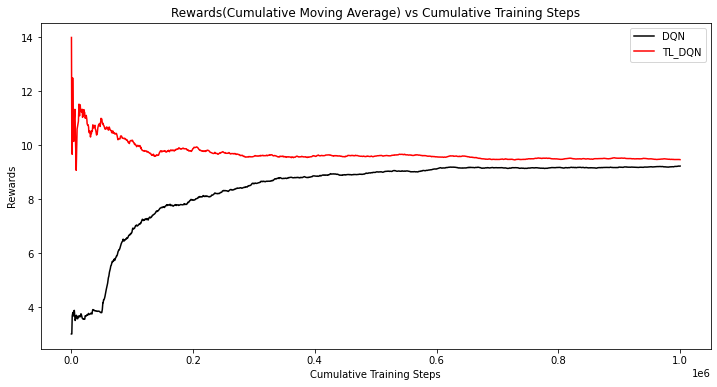

In [ ]:
# the dict in the log files are key to value pair, and the value is a long list
with open(experiment2_DQN_history) as json_file1:
  data1 = json.load(json_file1)

with open(experiment2_DQN_TL_history) as json_file2:
  data2 = json.load(json_file2)

dfy1 = pd.DataFrame.from_dict({'episode_reward' :data1['episode_reward']})
dfx1 = pd.DataFrame.from_dict({'nb_steps':data1['nb_steps']})
dfy2 = pd.DataFrame.from_dict({'episode_reward' :data2['episode_reward']})
dfx2 = pd.DataFrame.from_dict({'nb_steps':data2['nb_steps']})
plt.figure(figsize=(12, 6))
plt.plot(dfx1,dfy1.expanding(1).mean(), color='k', label = 'DQN')
plt.plot(dfx2,dfy2.expanding(1).mean(),  color='r', label = 'TL_DQN')
plt.xlabel("Cumulative Training Steps")
plt.ylabel("Rewards")
plt.title("Rewards(Cumulative Moving Average) vs Cumulative Training Steps")
plt.legend()
plt.show()